In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Where are there the most endangered species? 
What human influences affect different animals the most?
What locations present the most human influences? 
Do the locations of human influences usually coincide? 
 

Data processing / cleaning

In [ ]:
## read in data

#species data
species = pd.read_csv('species.csv')
#print(newspecies[['group', 'common_name', 'iucn_category', 'wb_datanam']])

#deforestation data
deforestation = pd.read_csv('deforestation.csv',  encoding='ISO-8859-1')

#air pollution data
air = pd.read_csv('air_pollution.csv')
air  = air[['Country', 'City', 'AQI Value']].sort_values(by=['Country','City']) #arrange the rows by their country/city
air = air.dropna()
air = air.groupby('Country')['AQI Value'].mean().reset_index() #mean the aqi index for all of the cities in the country to create a mean country aqi value

#urbanization data
urbanization = pd.read_csv('urbanization.csv')
urbanization = urbanization.drop(urbanization.columns[[1,2,3]], axis=1) #remove some columns with text
urbanization = urbanization.dropna() #remove nan values
urbanization.iloc[:, 1:] = urbanization.iloc[:, 1:].apply(pd.to_numeric, errors='coerce') # values are stored as strings, need to convert them t0 floats
urbanization['Average'] = urbanization.iloc[:, 1:].mean(axis=1) #add an average column for a 20 year average column, similar to the deforestation data

#1 Where are the most endangered species?

In [ ]:
endangeredSpecies = species[species['iucn_category'] == 'EN']
ENcounts = endangeredSpecies['wb_datanam'].value_counts()
ENcounts=ENcounts.sort_values(ascending=False)
print(ENcounts) #prints properly ordered

criticalSpecies = species[species['iucn_category'] == 'CR']
CRcounts = criticalSpecies['wb_datanam'].value_counts()
CRcounts=CRcounts.sort_values(ascending=False)
print(CRcounts) #prints properly ordered

speciesCount = pd.DataFrame({ #for some reason this is laid out alphabetically even though I Still working on this.
    '# of endangered species': ENcounts, 
    '# of critically endangered species': CRcounts
}).fillna(0)




In [85]:
CRcounts

United States                                   307
Colombia                                        261
Mexico                                          250
Madagascar                                      223
Ecuador                                         187
Brazil                                          187
Indonesia                                       184
Australia                                       172
India                                           168
Peru                                            165
Malaysia                                        123
China                                           122
Turkey                                          114
Venezuela, RB                                   113
Spain                                           111
Honduras                                        109
Cameroon                                        108
Panama                                          106
Thailand                                        104
Haiti       

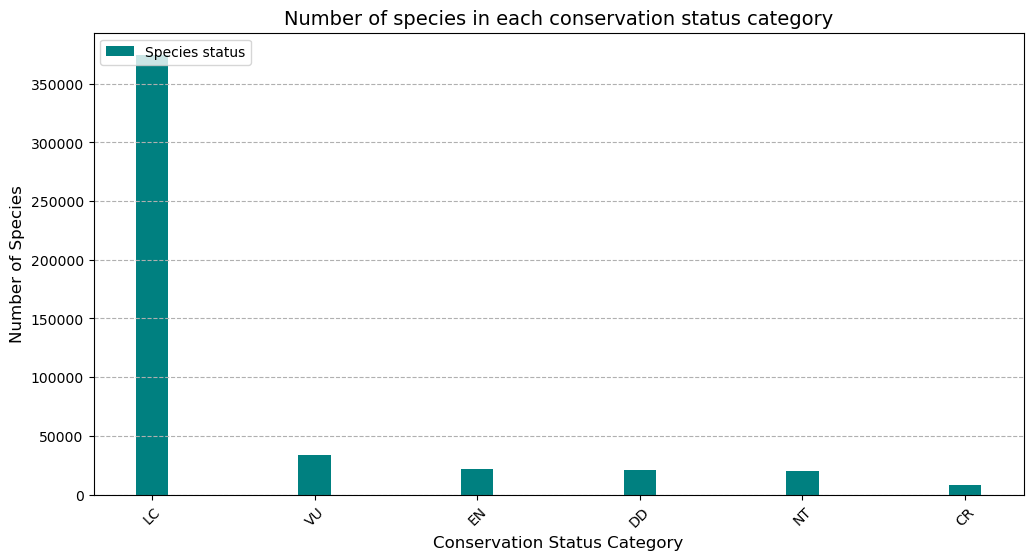

In [78]:
statusCounts = species['iucn_category'].value_counts() # create counts for each of the status types
bar_width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(statusCounts.index, statusCounts, bar_width, color='teal', label='Species status')

# Title and labels
plt.title('Number of species in each conservation status category', fontsize=14)
plt.xlabel('Conservation Status Category', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--')
# Add legend grid
plt.legend(loc='upper left')

# Show the plot
plt.show()

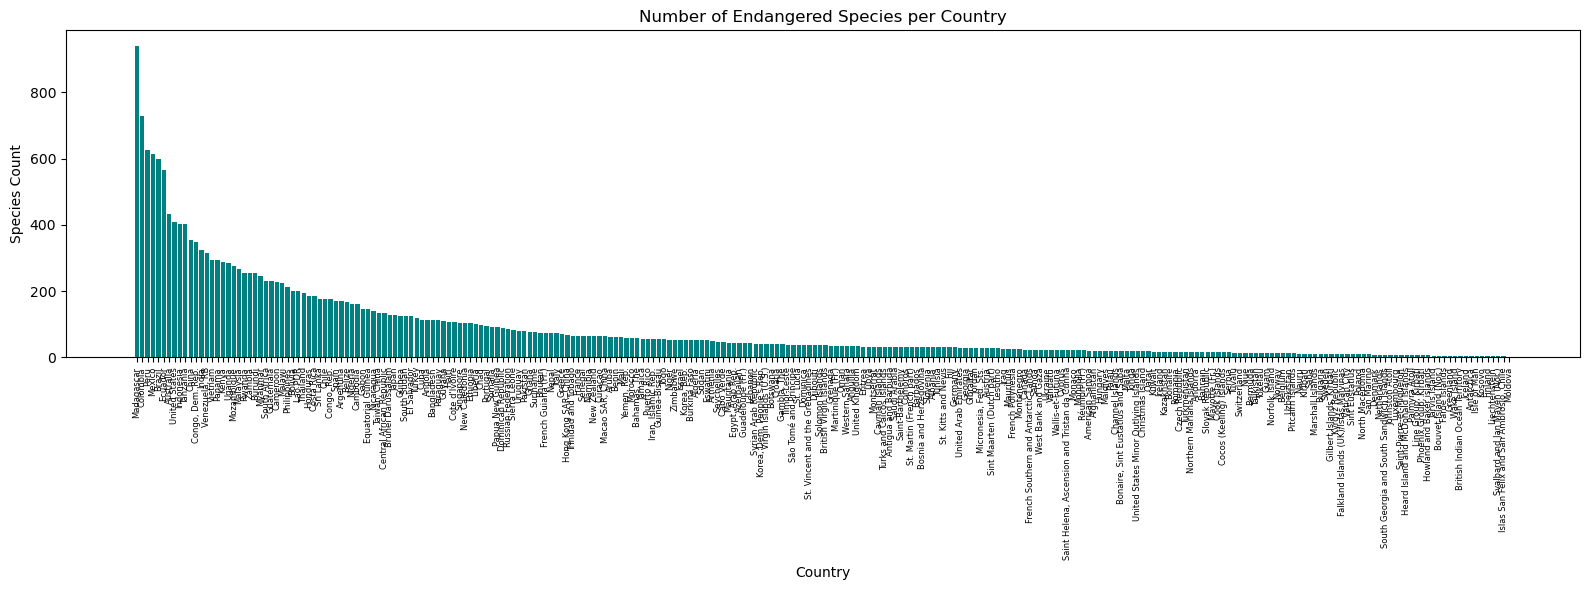

In [75]:
statusCounts = species['iucn_category'].value_counts()
bar_width = 0.2

# Title and labels
plt.figure(figsize=(16,6))
plt.bar(ENcounts.index, ENcounts.values, color='teal')
plt.xlabel('Country')
plt.ylabel('Species Count')
plt.title('Number of Endangered Species per Country')
plt.xticks(rotation=90, fontsize = 6)
plt.tight_layout()
plt.show()

# Show the plot
plt.show()

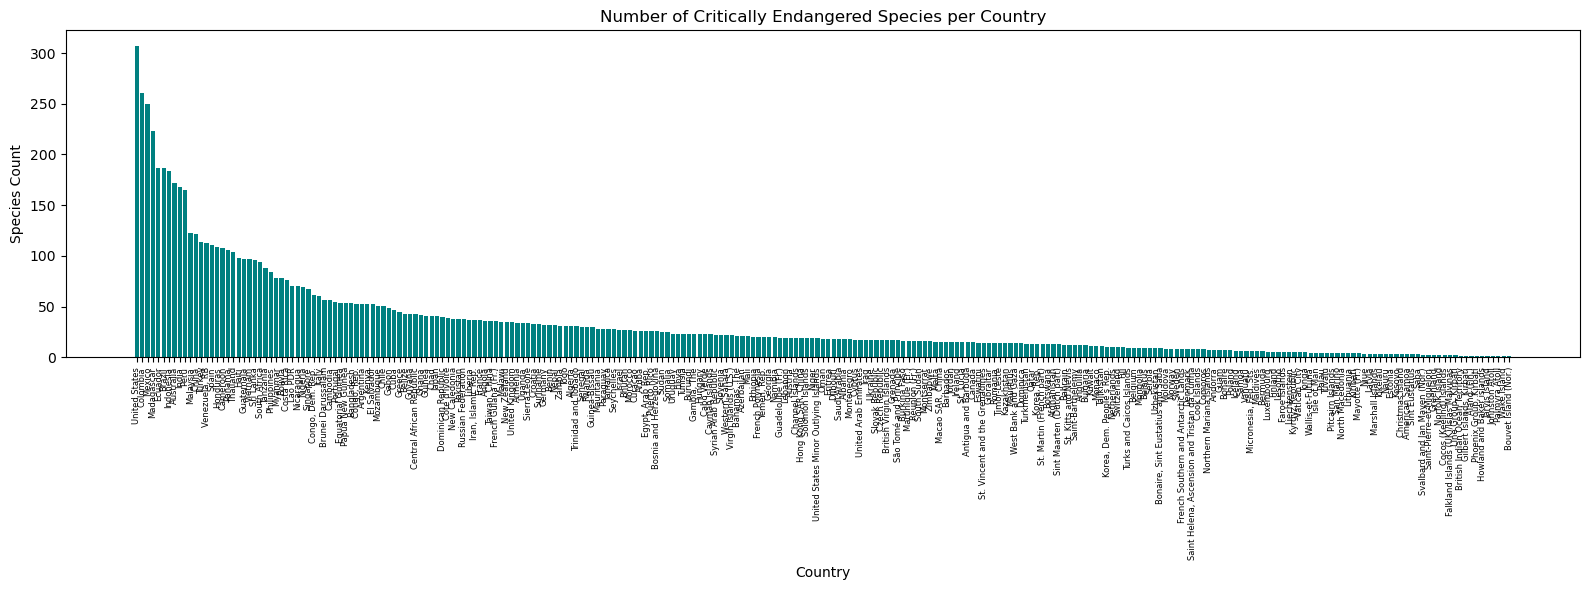

In [90]:
statusCounts = species['iucn_category'].value_counts() #name ffrom column
bar_width = 0.2

# Title and labels
plt.figure(figsize=(16,6))
plt.bar(CRcounts.index, CRcounts.values, color='teal') #using pd index values for plotting
plt.xlabel('Country')
plt.ylabel('Species Count')
plt.title('Number of Critically Endangered Species per Country')
plt.xticks(rotation=90, fontsize = 6)
plt.tight_layout()
plt.show()

#2 Where human influences affect different animals the most?

In [ ]:
endangeredSpecies[['group', 'binomial', 'common_name', 'iucn_category', 'wb_datanam']]

#3 What locations present the most human influence?

#4 Do the locations of human influence usually coinside within this data?

In [86]:
deforestation = deforestation.sort_values(by=['trend'])
deforestation = deforestation[~deforestation['trend'].isin([0, 100, -100])]
deforestation = deforestation.dropna(subset=['trend']) 
air = air.sort_values(by=['AQI Value'], ascending=False)
urbanization = urbanization.sort_values(by = ['Average'], ascending=False)


air = air.reset_index(drop=True)
deforestation = deforestation.reset_index(drop=True)
urbanization = urbanization.reset_index(drop=True)

humanInfluences = pd.DataFrame({
    'Countries with the Highest AQI': air['Country'],
    'AQI Value': air['AQI Value'],
    'Countries with the most negative trends in forest land coverage': deforestation['iso3c'],
    'Trend in percent land coverage': deforestation['trend'],
    'Countries with the highest percentage of urban populations': urbanization['Country Name'],
    'Average % population in an urban area 2000-2020': urbanization['Average'],
})

#print(humanInfluences)
print(air)



                                               Country   AQI Value
0                                    Republic of Korea  421.000000
1                                              Bahrain  188.000000
2                                           Mauritania  179.000000
3                                             Pakistan  178.788274
4                                 United Arab Emirates  163.666667
5                                                Aruba  163.000000
6                                               Kuwait  162.000000
7                                                Qatar  157.500000
8                                                India  152.964228
9                                              Senegal  152.424242
10                                        Saudi Arabia  149.285714
11                                              Gambia  147.000000
12                                               Yemen  144.571429
13                                       Guinea-Bissau  138.75

In [89]:
print(deforestation[['iso3c', 'trend']])

                                     iso3c  trend
0                            Côte d'Ivoire  -44.4
1                                Nicaragua  -37.0
2                                     Chad  -32.0
3                                   Gambia  -32.0
4                                 Paraguay  -30.1
5               Ssaint Pierre and Miquelon  -27.4
6                                  Malawai  -27.2
7                                   Uganda  -25.9
8                                 Cambodia  -25.2
9                               Mauritania  -25.0
10                                   Benin  -24.3
11                   North Mariani Islands  -23.7
12                                 Comoros  -21.0
13                                 Somalia  -20.8
14                                Pakistan  -18.6
15                                 Myanmar  -18.2
16                                 Namibia  -17.3
17                               Guatemala  -16.3
18                                   Sudan  -16.1


In [29]:
print(urbanization[['Country Name', 'Average']])

                       Country Name     Average
0              Hong Kong SAR, China  100.000000
1         Sint Maarten (Dutch part)  100.000000
2                    Cayman Islands  100.000000
3                            Monaco  100.000000
4                         Singapore  100.000000
5                           Bermuda  100.000000
6                             Nauru  100.000000
7                  Macao SAR, China  100.000000
8                         Gibraltar  100.000000
9                            Kuwait   99.948000
10                            Qatar   98.141667
11                          Belgium   97.634000
12                       San Marino   95.610857
13            Virgin Islands (U.S.)   94.469810
14                          Uruguay   94.139095
15                             Guam   94.074905
16                            Malta   93.915286
17                      Puerto Rico   93.885333
18                          Iceland   93.357762
19                           Israel   91

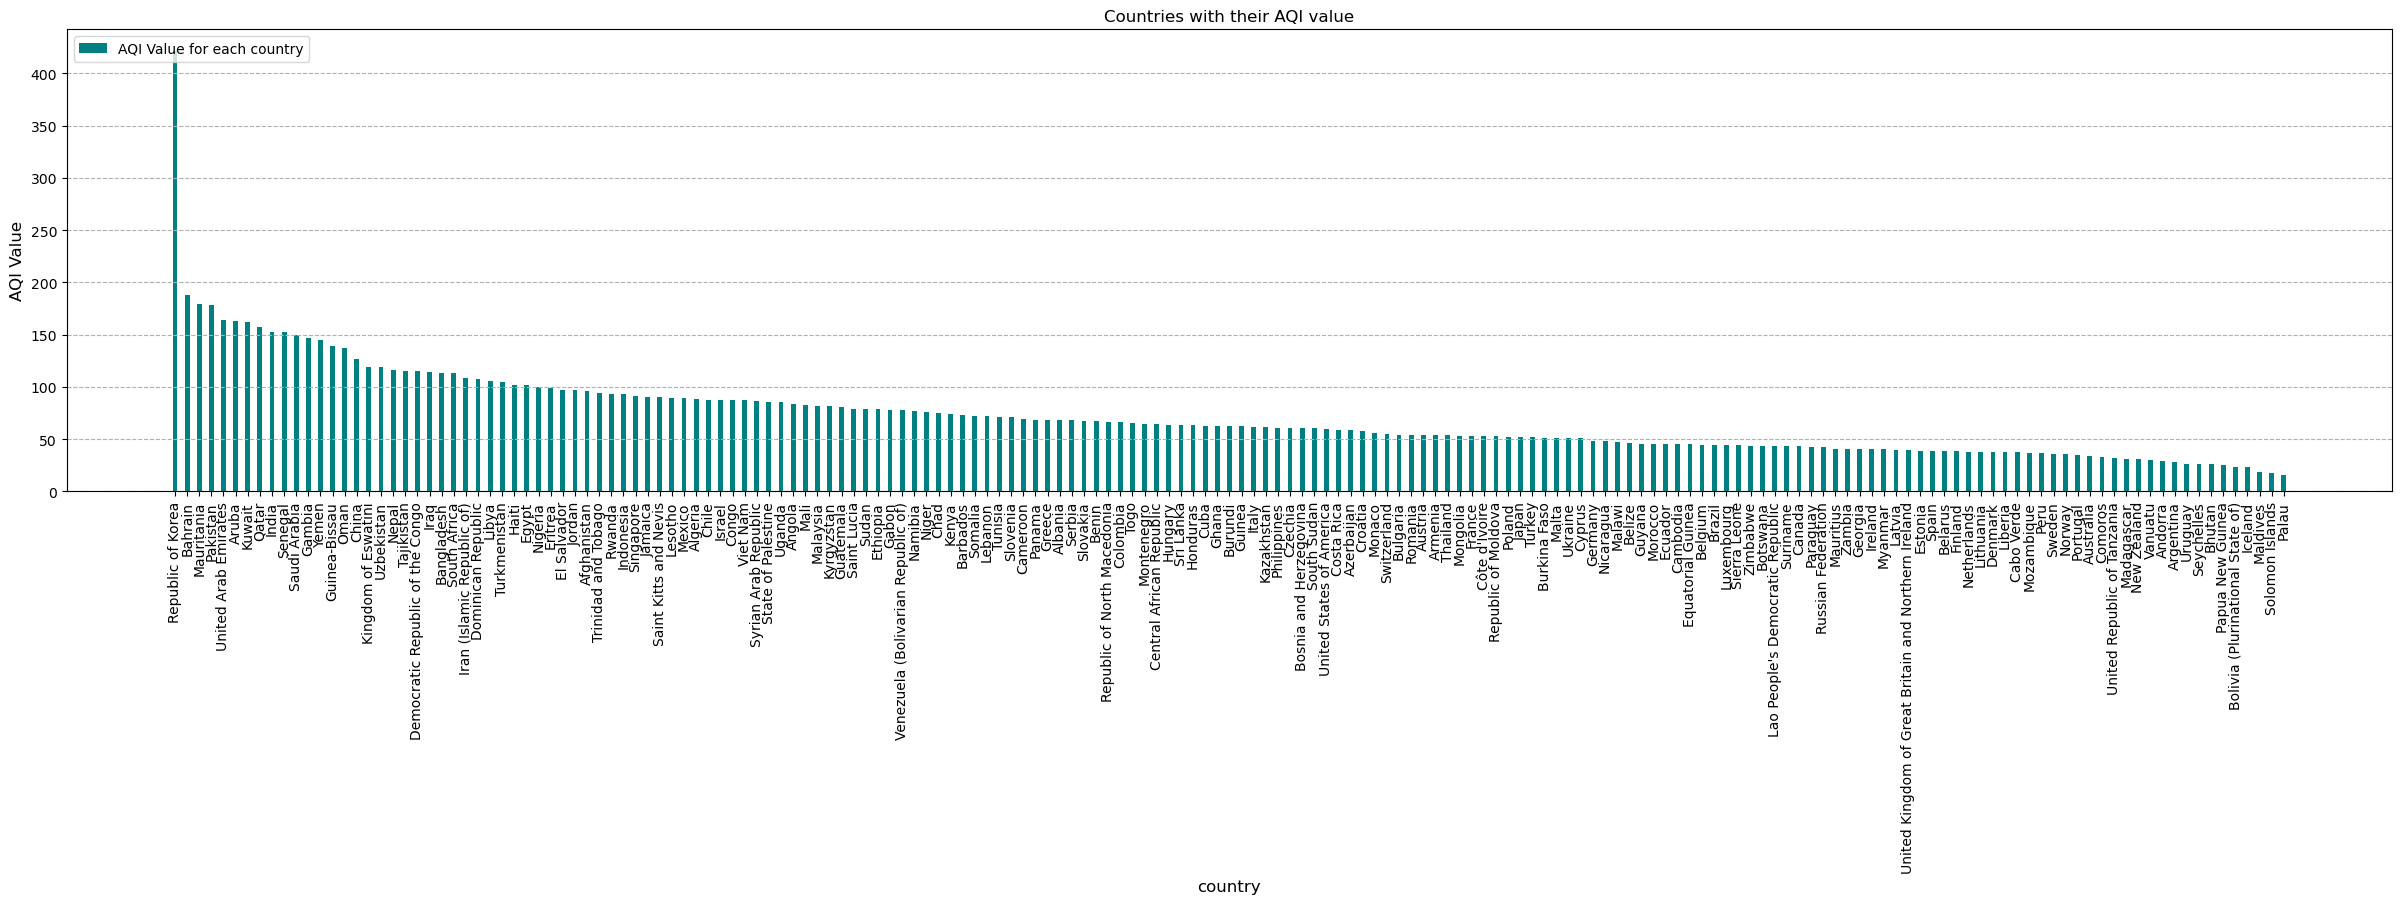

In [77]:
bar_width = 0.4

plt.figure(figsize=(30, 6))
plt.bar(air['Country'], air['AQI Value'], bar_width, color='teal', label='AQI Value for each country')
# Title and labels
plt.title('Countries with their AQI value', fontsize=12)
plt.xlabel('country', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.xticks(rotation=90, fontsize =10)
plt.grid(True, axis='y', linestyle='--')
# Add legend grid
plt.legend(loc='upper left')

# Show the plot
plt.show()

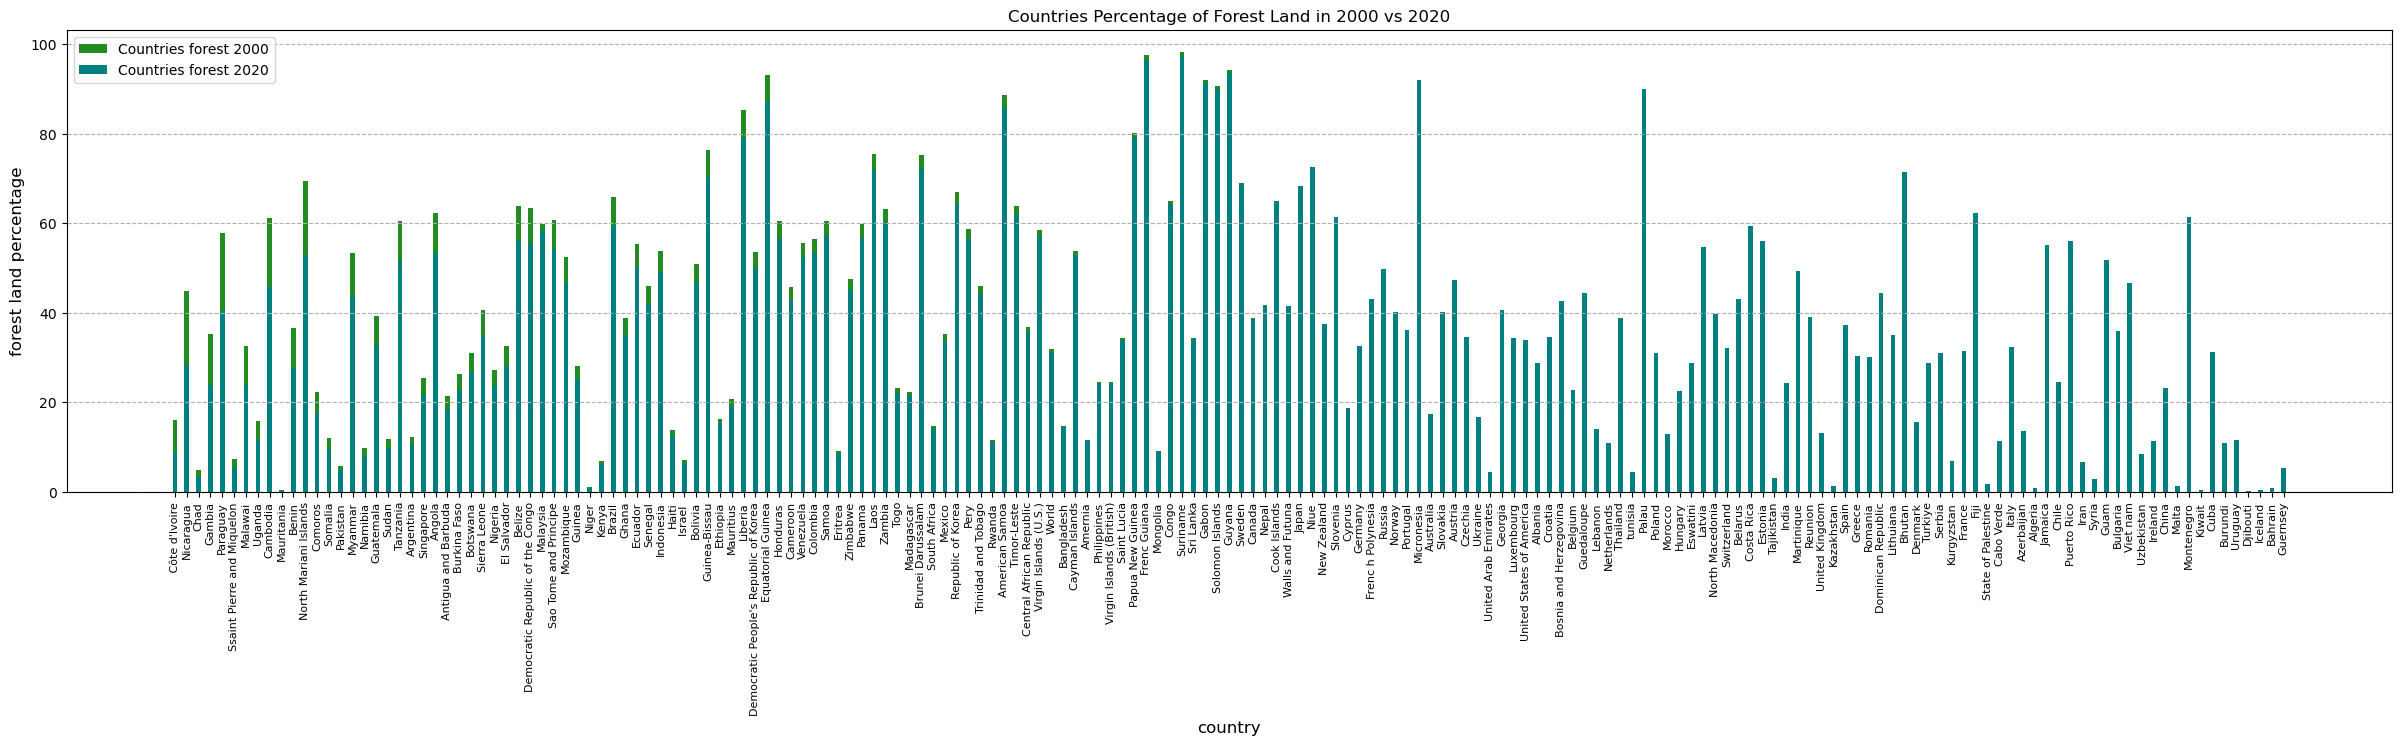

In [81]:
bar_width = 0.4

plt.figure(figsize=(30, 6))
plt.bar(deforestation['iso3c'], deforestation['forests_2000'], bar_width, color='forestgreen', label='Countries forest 2000')
plt.bar(deforestation['iso3c'], deforestation['forests_2020'], bar_width, color='teal', label='Countries forest 2020')
# Title and labels
plt.title('Countries Percentage of Forest Land in 2000 vs 2020', fontsize=12)
plt.xlabel('country', fontsize=12)
plt.ylabel('forest land percentage', fontsize=12)
plt.xticks(rotation=90, fontsize =8)
plt.grid(True, axis='y', linestyle='--')
# Add legend grid
plt.legend(loc='upper left')

# Show the plot
plt.show()